In [1]:
import sys
sys.path.append('../')
import torch.optim as optim
from datasetval import *
from model import *
import torch.nn.init as init
from sklearn.preprocessing import MinMaxScaler
from torch.utils.tensorboard import SummaryWriter

Train_epoch:0    MAE:106.88673217524821  Pure MAE:106.88673217524821
Train_epoch:10    MAE:6.275103083938785  Pure MAE:6.275103083938785
val_epoch:10    MAE_val:9.202095046079249
Test_epoch:10    MAE_test:14.47094326447218


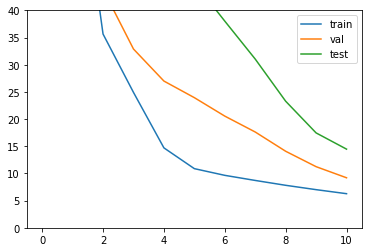

Train_epoch:20    MAE:5.304111601621702  Pure MAE:5.304111601621702
val_epoch:20    MAE_val:7.753157038437693
Test_epoch:20    MAE_test:11.569987072394444


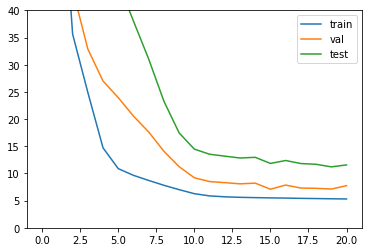

Train_epoch:30    MAE:4.9887285203409295  Pure MAE:4.9887285203409295
val_epoch:30    MAE_val:5.790200864462028
Test_epoch:30    MAE_test:8.019629162091475


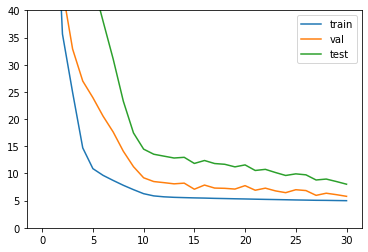

Train_epoch:40    MAE:4.895169051261638  Pure MAE:4.895169051261638
val_epoch:40    MAE_val:5.37548595980594
Test_epoch:40    MAE_test:7.2422559307171746


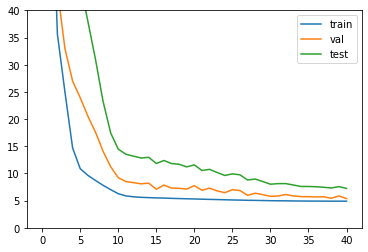

Train_epoch:50    MAE:4.887239530955701  Pure MAE:4.887239530955701
val_epoch:50    MAE_val:5.797482454687133
Test_epoch:50    MAE_test:7.753138117301158


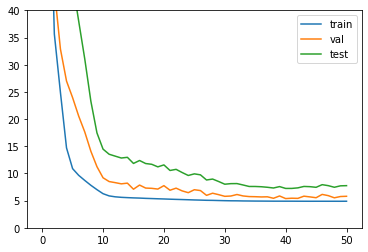

Train_epoch:60    MAE:4.879587285630329  Pure MAE:4.879587285630329
val_epoch:60    MAE_val:5.427072392370468
Test_epoch:60    MAE_test:7.291957879677797


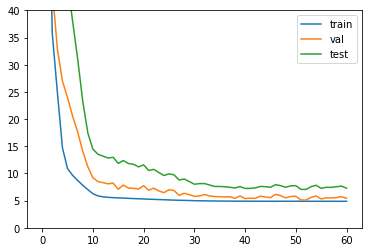

Train_epoch:70    MAE:4.881687867908517  Pure MAE:4.881687867908517
val_epoch:70    MAE_val:5.616526492556235
Test_epoch:70    MAE_test:7.7053388097347355


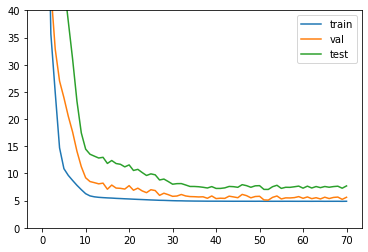

Train_epoch:80    MAE:4.873995919334427  Pure MAE:4.873995919334427
val_epoch:80    MAE_val:5.627108016408476
Test_epoch:80    MAE_test:7.683451687678312


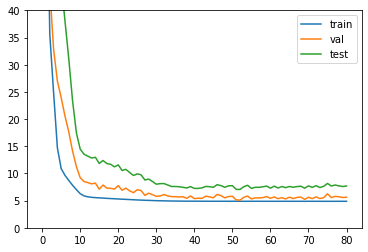

Train_epoch:90    MAE:4.867298836135087  Pure MAE:4.867298836135087
val_epoch:90    MAE_val:5.425866446100679
Test_epoch:90    MAE_test:7.51568768116144


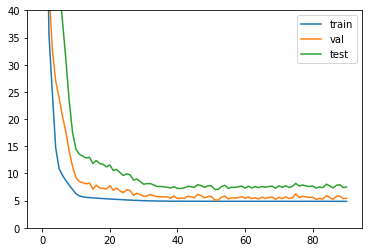

Train_epoch:100    MAE:4.871122471912329  Pure MAE:4.871122471912329
val_epoch:100    MAE_val:5.268330885951681
Test_epoch:100    MAE_test:7.396469108569316


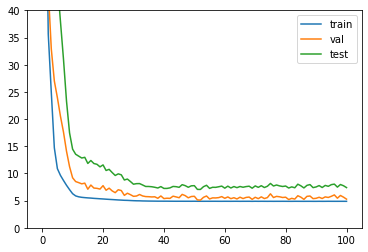

Train_epoch:110    MAE:4.871857670319784  Pure MAE:4.871857670319784
val_epoch:110    MAE_val:5.411274831097825
Test_epoch:110    MAE_test:7.5184490115214615


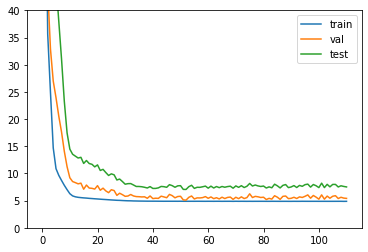

Train_epoch:120    MAE:4.864640566579193  Pure MAE:4.864640566579193
val_epoch:120    MAE_val:5.906769325858669
Test_epoch:120    MAE_test:8.003713074402931


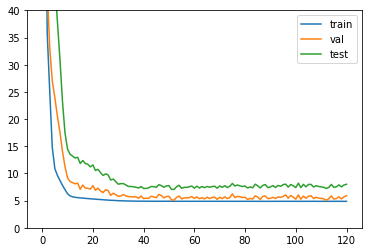

Train_epoch:130    MAE:4.877034747187815  Pure MAE:4.877034747187815
val_epoch:130    MAE_val:5.567307318063607
Test_epoch:130    MAE_test:7.695688348550063


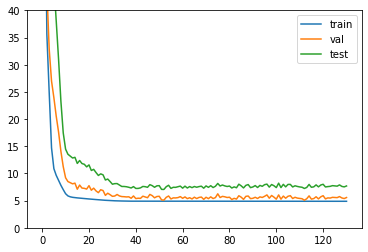

Train_epoch:140    MAE:4.863769596317392  Pure MAE:4.863769596317392
val_epoch:140    MAE_val:5.441778810400712
Test_epoch:140    MAE_test:7.600535096266331


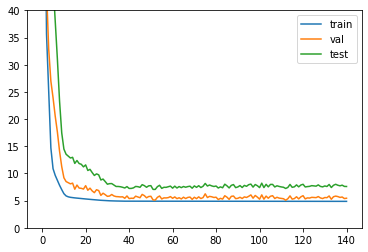

Train_epoch:150    MAE:4.869122097302843  Pure MAE:4.869122097302843
val_epoch:150    MAE_val:5.701254136580274
Test_epoch:150    MAE_test:7.793888931091015


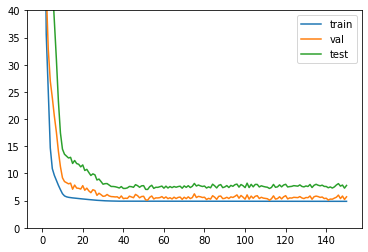

Train_epoch:160    MAE:4.870306564688439  Pure MAE:4.870306564688439
val_epoch:160    MAE_val:5.4378192388921756
Test_epoch:160    MAE_test:7.659883911793049


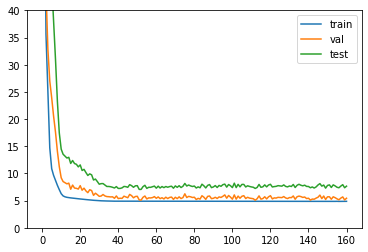

Train_epoch:170    MAE:4.864687965260989  Pure MAE:4.864687965260989
val_epoch:170    MAE_val:5.480817169175112
Test_epoch:170    MAE_test:7.7323215909493275


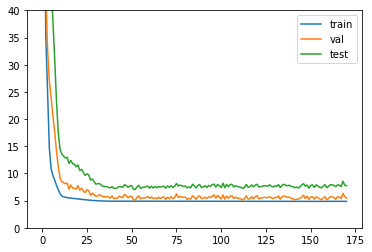

Train_epoch:180    MAE:4.864808570586009  Pure MAE:4.864808570586009
val_epoch:180    MAE_val:5.4925208055883425
Test_epoch:180    MAE_test:7.710756165859027


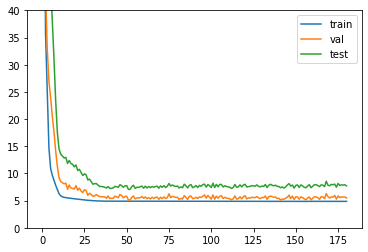

Train_epoch:190    MAE:4.8571499875024  Pure MAE:4.8571499875024
val_epoch:190    MAE_val:6.011086555351889
Test_epoch:190    MAE_test:8.270260482262342


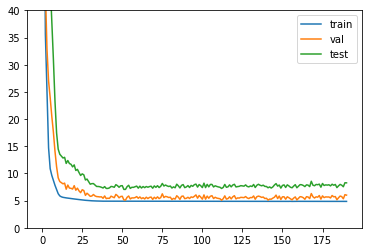

Train_epoch:200    MAE:4.852649690177436  Pure MAE:4.852649690177436
val_epoch:200    MAE_val:5.56535620079901
Test_epoch:200    MAE_test:7.627004446127476


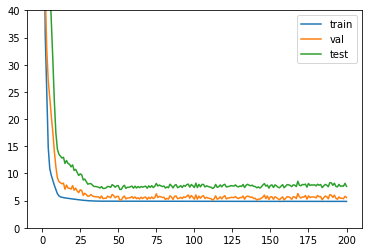

Train_epoch:210    MAE:4.861179272657499  Pure MAE:4.861179272657499
val_epoch:210    MAE_val:5.699640887124198
Test_epoch:210    MAE_test:7.95999363446847


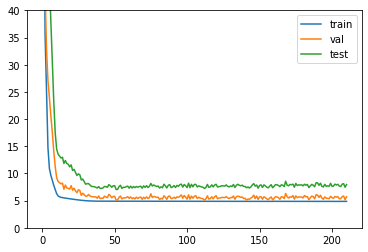

Train_epoch:220    MAE:4.855448324665761  Pure MAE:4.855448324665761
val_epoch:220    MAE_val:5.784446981616486
Test_epoch:220    MAE_test:8.037456165521572


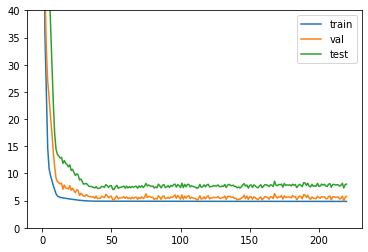

Train_epoch:230    MAE:4.857923380954688  Pure MAE:4.857923380954688
val_epoch:230    MAE_val:5.964280748725834
Test_epoch:230    MAE_test:8.275432577499977


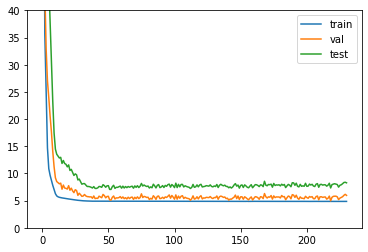

Train_epoch:240    MAE:4.8592009811440215  Pure MAE:4.8592009811440215
val_epoch:240    MAE_val:5.685247190016553
Test_epoch:240    MAE_test:8.076148216540997


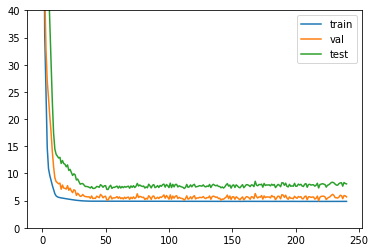

Train_epoch:250    MAE:4.855176426485454  Pure MAE:4.855176426485454
val_epoch:250    MAE_val:5.367510092885871
Test_epoch:250    MAE_test:7.7142165914559975


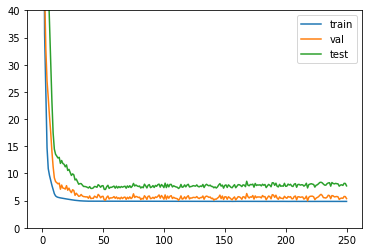

Train_epoch:260    MAE:4.846043725606138  Pure MAE:4.846043725606138
val_epoch:260    MAE_val:5.868795459431813
Test_epoch:260    MAE_test:8.388554227657806


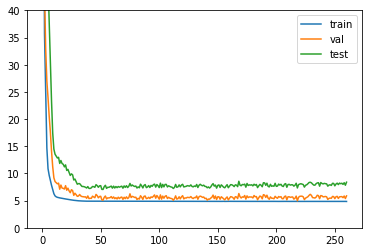

Train_epoch:270    MAE:4.847938720174817  Pure MAE:4.847938720174817
val_epoch:270    MAE_val:5.544181088755901
Test_epoch:270    MAE_test:8.020356789613382


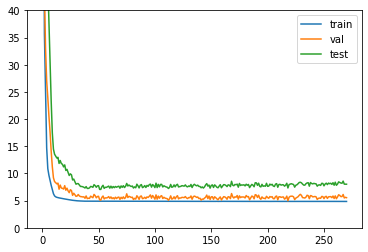

Train_epoch:280    MAE:4.851586193756756  Pure MAE:4.851586193756756
val_epoch:280    MAE_val:5.812627684801145
Test_epoch:280    MAE_test:8.352828067082624


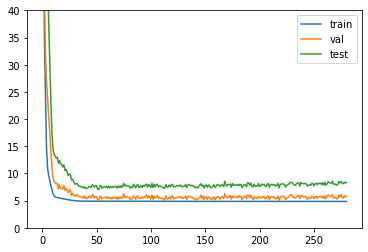

Train_epoch:290    MAE:4.850517163208692  Pure MAE:4.850517163208692
val_epoch:290    MAE_val:6.000454264475887
Test_epoch:290    MAE_test:8.76106074375984


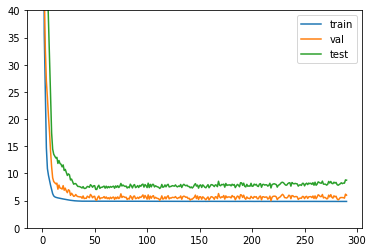

Train_epoch:300    MAE:4.818870641549105  Pure MAE:4.818870641549105
val_epoch:300    MAE_val:6.03244616214494
Test_epoch:300    MAE_test:9.317065662298447


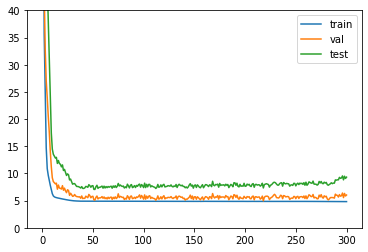

Train_epoch:310    MAE:4.806046707809821  Pure MAE:4.806046707809821
val_epoch:310    MAE_val:5.961208494086015
Test_epoch:310    MAE_test:9.303959085391117


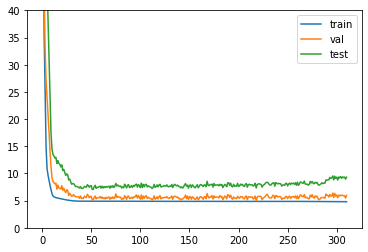

Train_epoch:320    MAE:4.8009552198126455  Pure MAE:4.8009552198126455
val_epoch:320    MAE_val:5.4855589149589825
Test_epoch:320    MAE_test:9.255246413059723


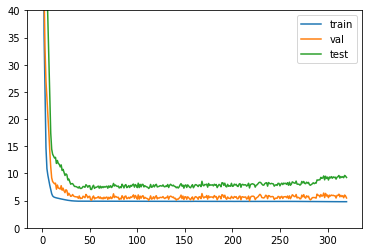

Train_epoch:330    MAE:4.767469286190273  Pure MAE:4.767469286190273
val_epoch:330    MAE_val:6.022869310880962
Test_epoch:330    MAE_test:9.934388391482525


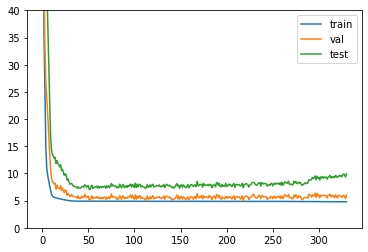

Train_epoch:340    MAE:4.718080056903319  Pure MAE:4.718080056903319
val_epoch:340    MAE_val:5.974837880385549
Test_epoch:340    MAE_test:10.319295811347473


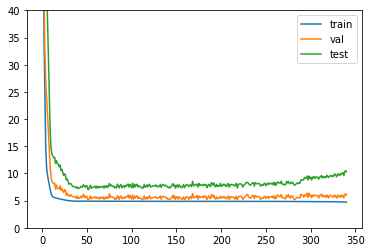

Train_epoch:350    MAE:4.685391765019559  Pure MAE:4.685391765019559
val_epoch:350    MAE_val:5.481585495454028
Test_epoch:350    MAE_test:9.811434880281107


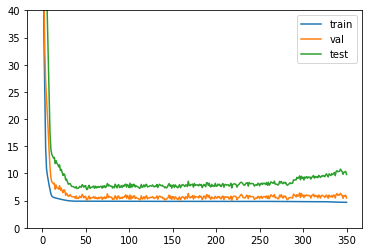

Train_epoch:360    MAE:4.65300082043572  Pure MAE:4.65300082043572
val_epoch:360    MAE_val:5.365724583317463
Test_epoch:360    MAE_test:9.513862140667744


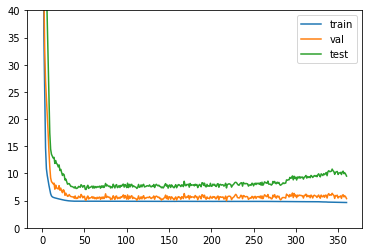

Train_epoch:370    MAE:4.622171428684305  Pure MAE:4.622171428684305
val_epoch:370    MAE_val:5.587289335136127
Test_epoch:370    MAE_test:9.512307142600035


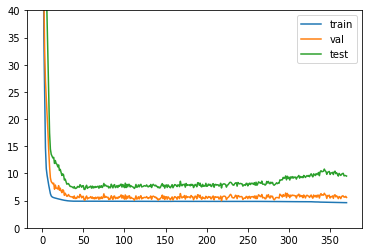

Train_epoch:380    MAE:4.593871757114978  Pure MAE:4.593871757114978
val_epoch:380    MAE_val:5.553935972371495
Test_epoch:380    MAE_test:9.223149516643621


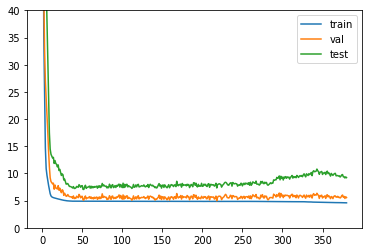

In [ ]:
s_or_d = "s"
unrelated_feature_number = 0
feature_number = 3

train_log = np.array([])
val_log = np.array([])
test_log = np.array([])


batchsize = 32
lambda_l1 = 0.005  # 正则化系数
lambda_selection = 0

criterion = nn.L1Loss()
criterion = criterion.cuda()

model = MLP(feature_number).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)


train_dataset = Dataset("../data/features_rand_train_90_130.npy", s_or_d, 0, unrelated_feature_number)
train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True,drop_last=True)

val_dataset = Dataset("../data/features_rand_validate_130_140.npy", s_or_d, 1, unrelated_feature_number)
val_loader = DataLoader(val_dataset, batch_size=batchsize, shuffle=True,drop_last=True)

test_dataset = Dataset("../data/features_rand_test.npy", s_or_d, 2, unrelated_feature_number)
test_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=True,drop_last=True)


for epoch in range(501):
    
    # print(f"Learning Rate (Single LR): {optimizer.param_groups[0]['lr']}")
    
    model.train()
    # print(epoch)
    loss_total = 0
    step = 0
    loss_pure = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()

        # print(data.shape)

        # target = (target - min) / (max - min)

        output = model(data)

        loss = criterion(output, target)
        
        loss_pure = loss_pure + loss.item()
        
#         l1_regularization = torch.tensor(0.0).cuda()
#         l1_selection = torch.tensor(0.0).cuda()
        
#         for param in model.seq.parameters():
#             l1_regularization += torch.norm(param, p=1)
        
        # for param in model.OneToOneLayer.parameters():
        #     l1_selection += torch.norm(param, p=1)
        
        # loss = loss + l1_regularization * lambda_l1 + l1_selection * lambda_selection

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_total = loss_total + loss.item()
        step = step + 1
    
    # scheduler.step()
    
    # writer["train"].add_scalar('FS', loss_total/step, epoch)  
    train_log = np.append(train_log, loss_total/step)
    
    tmp = '../pth/tmp_%d_%.2f.pth' % (epoch, loss_total/step)
    
    if epoch % 10 == 0:
        torch.save(model, tmp)
        print("Train_epoch:" + str(epoch) + "    MAE:" + str(loss_total/step) + "  Pure MAE:" + str(loss_pure/step)) 
    # print("train finish")
    loss_test = 0
    loss_val = 0
    step_val = 0
    step_test = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(val_loader):
            data, target = data.cuda(), target.cuda()
            output = model(data)

            loss = criterion(output, target)

            loss_val += loss.item()
            step_val += 1
        
        
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.cuda(), target.cuda()
            output = model(data)

            # inv_norm
            # output = output * (max - min) + min

            loss = criterion(output, target)

            loss_test += loss.item()
            step_test += 1
            

        loss_mean = loss_test / step_test
        loss_val_mean = loss_val / step_val
        
        # writer["test"].add_scalar('FS', loss_mean, epoch) 
        test_log = np.append(test_log, loss_mean)
        val_log = np.append(val_log, loss_val_mean)
        
        if epoch % 10 == 0 and epoch != 0:
            print("val_epoch:" + str(epoch) + "    MAE_val:" + str(loss_val_mean))
            print("Test_epoch:" + str(epoch) + "    MAE_test:" + str(loss_mean))
            # tmp_epoch = np.arange(epoch+1)
            # print(tmp_epoch)
            plt.plot(train_log)
            plt.plot(val_log)
            plt.plot(test_log)
            
            plt.legend(["train","val","test"])
            plt.ylim(0,40)
            plt.show()